In [1]:
# =================================================================
# Celda 25: Dashboard de Ratios Fundamentales del Sector
# =================================================================
import pandas as pd
import yfinance as yf
import config as cfg

# --- 1. Definimos los tickers y los ratios que queremos ---
tickers = [cfg.EMPRESA_PRINCIPAL, 'AAPL', 'IBM', 'ORCL', 'CSCO']

# Mapeo de nombres de ratios a las claves de la API de yfinance
# Agrupamos por categoría para que la tabla sea más ordenada
ratio_map = {
    'Ratios de Valuación': {
        'EV/EBITDA': 'enterpriseToEbitda',
        'EV/Revenue': 'enterpriseToRevenue',
        'Forward P/E': 'forwardPE',
        'Trailing P/E': 'trailingPE',
        'PEG Ratio': 'pegRatio',
        'Price/Book': 'priceToBook',
        'Price/Sales': 'priceToSalesTrailing12Months'
    },
    'Ratios de Rentabilidad': {
        'Operating Margin': 'operatingMargins',
        'Profit Margin': 'profitMargins',
        'Return on Assets (ROA)': 'returnOnAssets',
        'Return on Equity (ROE)': 'returnOnEquity'
    },
    'Ratios de Solvencia': {
        'Total Debt/Equity': 'debtToEquity',
        # 'Interest Coverage': 'interestCoverage' # Nota: yfinance no provee este dato directamente
    },
    'Ratios de Mercado': {
        'Market Cap': 'marketCap',
        '52 Week High': 'fiftyTwoWeekHigh',
        '52 Week Low': 'fiftyTwoWeekLow',
        '52-Week Change': '52WeekChange',
        'Beta': 'beta'
    }
}

# --- 2. Recopilamos los datos para cada ticker ---
sector_dashboard_data = {}
all_ratios_list = []

print("Descargando datos fundamentales...")
for category, ratios in ratio_map.items():
    for ratio_name, key in ratios.items():
        all_ratios_list.append(ratio_name)

for ticker_symbol in tickers:
    ticker_obj = yf.Ticker(ticker_symbol)
    info = ticker_obj.info
    
    ticker_ratios = []
    for category, ratios in ratio_map.items():
        for ratio_name, key in ratios.items():
            ticker_ratios.append(info.get(key, 'N/A')) # Usamos .get() para manejar datos faltantes
    
    sector_dashboard_data[ticker_symbol] = ticker_ratios

# --- 3. Creamos y mostramos el DataFrame ---
dashboard_df = pd.DataFrame(sector_dashboard_data, index=all_ratios_list)

# --- 4. Formateamos los datos para mejor lectura ---
def format_value(name, value):
    if isinstance(value, (int, float)):
        if name in ['Operating Margin', 'Profit Margin', 'ROA', 'ROE', '52-Week Change']:
            return f"{value:.2%}"
        if name == 'Market Cap':
            return f"${value/1e9:,.2f}B" # En miles de millones (Billions)
        if 'P/E' in name or 'EV/' in name or 'Ratio' in name or 'Price/' in name or 'Beta' in name:
            return f"{value:.2f}"
    return value

for col in dashboard_df.columns:
    dashboard_df[col] = [format_value(name, val) for name, val in zip(dashboard_df.index, dashboard_df[col])]


print("\n--- Dashboard Sectorial Comparativo ---")
display(dashboard_df)

Descargando datos fundamentales...

--- Dashboard Sectorial Comparativo ---


,MSFT,AAPL,IBM,ORCL,CSCO
EV/EBITDA,25.25,24.38,19.11,34.55,20.15
EV/Revenue,14.03,8.45,4.23,14.13,5.34
Forward P/E,35.23,28.03,22.51,34.66,18.13
Trailing P/E,38.58,35.35,38.52,57.18,28.86
PEG Ratio,N/A,N/A,N/A,N/A,N/A
Price/Book,11.40,52.57,8.09,34.06,6.10
Price/Sales,13.90,8.46,3.47,12.14,5.03
Operating Margin,44.90%,29.99%,18.32%,32.48%,23.29%
Profit Margin,36.15%,24.30%,9.11%,21.68%,17.60%
Return on Assets (ROA),0.14203,0.24546,0.04813,0.07255,0.062


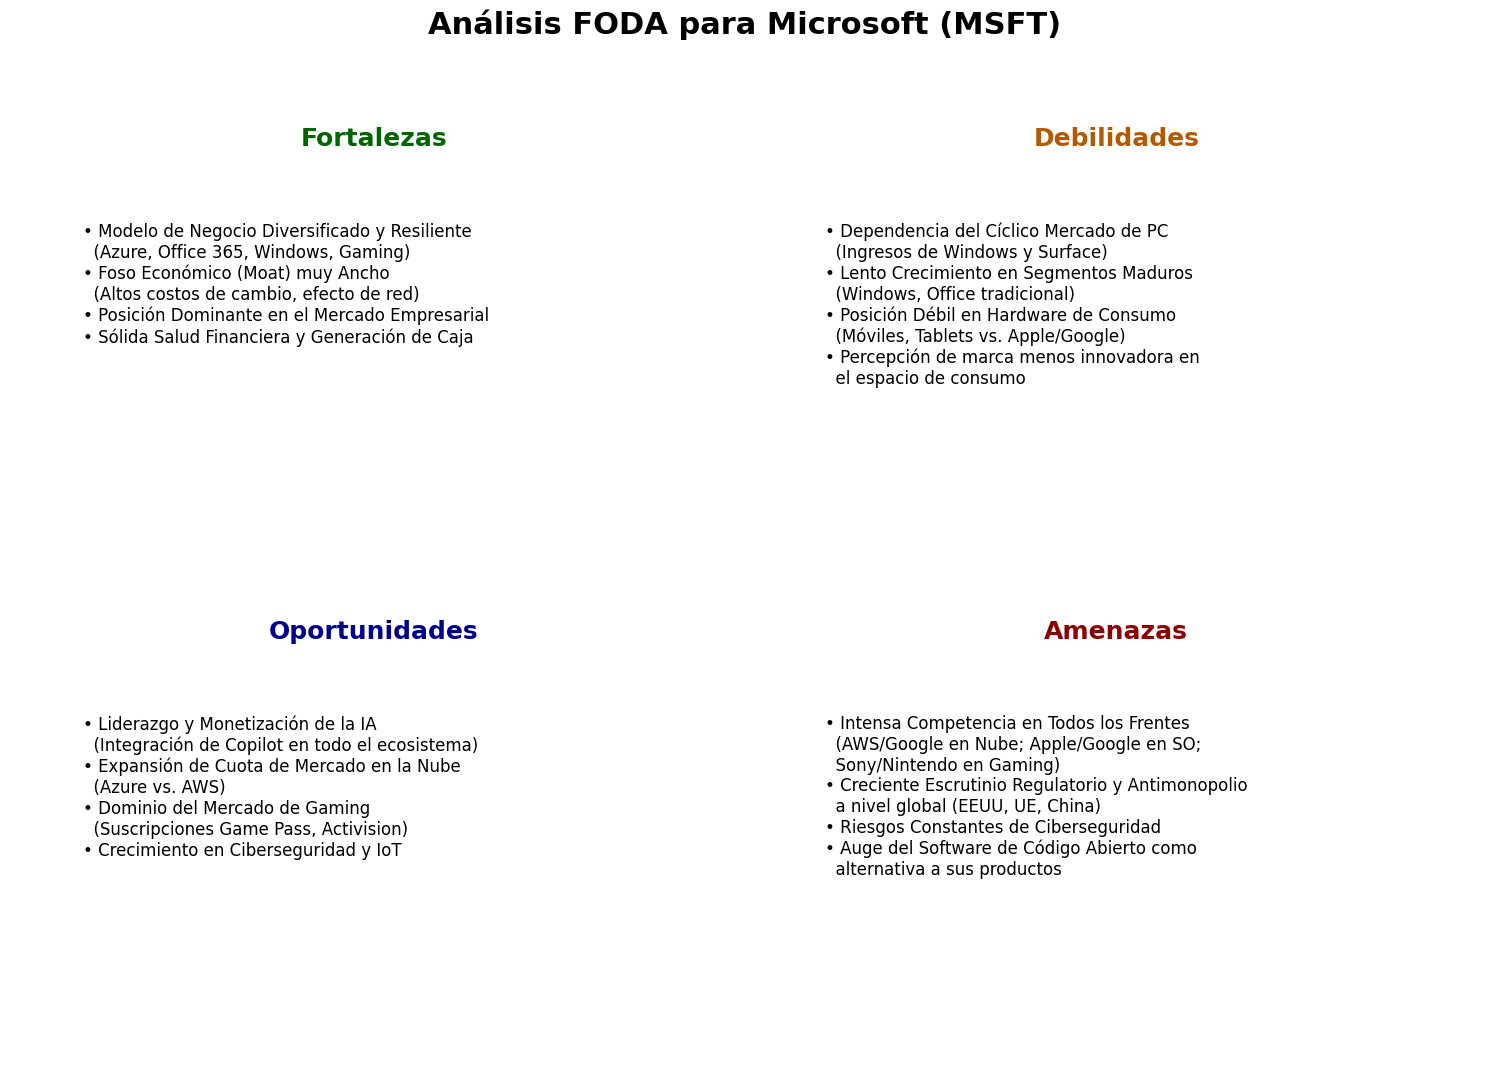

In [3]:
# =================================================================
# Celda 26: Gráfico de Análisis FODA (Versión Mejorada)
# =================================================================
import matplotlib.pyplot as plt

# --- 1. Contenido Ampliado para cada cuadrante ---
strengths_text = ("\u2022 Modelo de Negocio Diversificado y Resiliente\n"
                  "  (Azure, Office 365, Windows, Gaming)\n"
                  "\u2022 Foso Económico (Moat) muy Ancho\n"
                  "  (Altos costos de cambio, efecto de red)\n"
                  "\u2022 Posición Dominante en el Mercado Empresarial\n"
                  "\u2022 Sólida Salud Financiera y Generación de Caja")

weaknesses_text = ("\u2022 Dependencia del Cíclico Mercado de PC\n"
                   "  (Ingresos de Windows y Surface)\n"
                   "\u2022 Lento Crecimiento en Segmentos Maduros\n"
                   "  (Windows, Office tradicional)\n"
                   "\u2022 Posición Débil en Hardware de Consumo\n"
                   "  (Móviles, Tablets vs. Apple/Google)\n"
                   "\u2022 Percepción de marca menos innovadora en\n"
                   "  el espacio de consumo")

opportunities_text = ("\u2022 Liderazgo y Monetización de la IA\n"
                      "  (Integración de Copilot en todo el ecosistema)\n"
                      "\u2022 Expansión de Cuota de Mercado en la Nube\n"
                      "  (Azure vs. AWS)\n"
                      "\u2022 Dominio del Mercado de Gaming\n"
                      "  (Suscripciones Game Pass, Activision)\n"
                      "\u2022 Crecimiento en Ciberseguridad y IoT")

threats_text = ("\u2022 Intensa Competencia en Todos los Frentes\n"
                "  (AWS/Google en Nube; Apple/Google en SO;\n"
                "  Sony/Nintendo en Gaming)\n"
                "\u2022 Creciente Escrutinio Regulatorio y Antimonopolio\n"
                "  a nivel global (EEUU, UE, China)\n"
                "\u2022 Riesgos Constantes de Ciberseguridad\n"
                "\u2022 Auge del Software de Código Abierto como\n"
                "  alternativa a sus productos")

# --- 2. Creación del Gráfico ---
fig, axes = plt.subplots(2, 2, figsize=(15, 11))
fig.suptitle('Análisis FODA para Microsoft (MSFT)', fontsize=22, fontweight='bold')

# --- 3. Función de Configuración Mejorada ---
def setup_ax_improved(ax, title, content, color, bg_color):
    ax.axis('off')
    ax.set_facecolor(bg_color)
    # Título del cuadrante
    ax.text(0.5, 0.95, title, ha='center', va='top', fontsize=18, fontweight='bold', color=color)
    # Contenido del cuadrante
    ax.text(0.1, 0.75, content, ha='left', va='top', fontsize=12, wrap=True)

# --- 4. Configuración de cada cuadrante ---
# Fortalezas (Arriba-Izquierda)
setup_ax_improved(axes[0, 0], 'Fortalezas', strengths_text, 'darkgreen', '#e6ffed')

# Debilidades (Arriba-Derecha)
setup_ax_improved(axes[0, 1], 'Debilidades', weaknesses_text, '#b35900', '#fff4e6')

# Oportunidades (Abajo-Izquierda)
setup_ax_improved(axes[1, 0], 'Oportunidades', opportunities_text, 'darkblue', '#e6f2ff')

# Amenazas (Abajo-Derecha)
setup_ax_improved(axes[1, 1], 'Amenazas', threats_text, 'darkred', '#ffe6e6')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [5]:
# =================================================================
# Celda 27: Valuación por DCF Simplificado (Corregida)
# =================================================================
import pandas as pd
import yfinance as yf
import numpy as np
import config as cfg

# --- 1. Recopilación de Datos ---
ticker = yf.Ticker(cfg.EMPRESA_PRINCIPAL)
info = ticker.info

# Datos necesarios
fcf = info.get('freeCashflow', 0)
shares_outstanding = info.get('sharesOutstanding', 1)
market_cap = info.get('marketCap', 0)
total_debt = info.get('totalDebt', 0)
total_cash = info.get('totalCash', 0)
beta = info.get('beta', 1.0)
current_price = info.get('currentPrice', 0)

# --- 2. Asunciones Clave ---
# --- CORRECCIÓN AQUÍ ---
# Crecimiento a corto plazo (5 años), usamos la estimación de analistas
try:
    # Usamos el nuevo método .get_analysis()
    analysis_data = ticker.get_analysis()
    growth_rate_5y = analysis_data['Growth'].iloc[4, 0]
    # Verificamos si el dato es válido, si no, usamos un default
    if pd.isna(growth_rate_5y):
        growth_rate_5y = 0.10
        print("Advertencia: Estimación de crecimiento no disponible, usando 10% por defecto.")
except Exception as e:
    print(f"Advertencia: No se pudo obtener la estimación de crecimiento de analistas. Usando 10% por defecto. Error: {e}")
    growth_rate_5y = 0.10

# Crecimiento a perpetuidad (conservador, similar al crecimiento del PBI global)
perpetual_growth_rate = 0.025
# Tasa de impuestos corporativos
tax_rate = 0.21
# Tasa libre de riesgo (proxy: Bono del Tesoro de EEUU a 10 años)
risk_free_rate = 0.042 # Asunción basada en el contexto actual
# Retorno esperado del mercado
market_return = 0.08

# --- 3. Cálculo del WACC (Tasa de Descuento) ---
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
cost_of_debt = 0.05 # Asunción para una empresa AAA como MSFT
equity_weight = market_cap / (market_cap + total_debt)
debt_weight = total_debt / (market_cap + total_debt)
wacc = (equity_weight * cost_of_equity) + (debt_weight * cost_of_debt * (1 - tax_rate))

# --- 4. Proyección y Descuento de Flujos de Caja ---
future_fcf = []
for year in range(1, 6):
    fcf_year = fcf * (1 + growth_rate_5y)**year
    future_fcf.append(fcf_year)

terminal_value = (future_fcf[-1] * (1 + perpetual_growth_rate)) / (wacc - perpetual_growth_rate)
dcf_values = future_fcf + [terminal_value]
discounted_values = [cf / ((1 + wacc)**(i+1)) for i, cf in enumerate(dcf_values)]

# --- 5. Cálculo del Valor Intrínseco por Acción ---
enterprise_value = sum(discounted_values)
equity_value = enterprise_value - total_debt + total_cash
intrinsic_value_per_share = equity_value / shares_outstanding

print(f"\n--- Resultados de la Valuación DCF para {cfg.EMPRESA_PRINCIPAL} ---")
print(f"Tasa de Crecimiento a 5 años (usada): {growth_rate_5y:.2%}")
print(f"Tasa de Descuento (WACC): {wacc:.2%}")
print(f"Valor Intrínseco por Acción: ${intrinsic_value_per_share:.2f}")
print(f"Precio Actual de Mercado: ${current_price:.2f}")
print(f"Potencial de Suba/Baja: {(intrinsic_value_per_share/current_price - 1):.2%}")

Advertencia: No se pudo obtener la estimación de crecimiento de analistas. Usando 10% por defecto. Error: 'Ticker' object has no attribute 'get_analysis'

--- Resultados de la Valuación DCF para MSFT ---
Tasa de Crecimiento a 5 años (usada): 10.00%
Tasa de Descuento (WACC): 8.09%
Valor Intrínseco por Acción: $193.07
Precio Actual de Mercado: $525.16
Potencial de Suba/Baja: -63.24%


In [6]:
# =================================================================
# Celda 28: Análisis de Sensibilidad
# =================================================================
wacc_range = [wacc - 0.01, wacc, wacc + 0.01]
growth_range = [perpetual_growth_rate - 0.005, perpetual_growth_rate, perpetual_growth_rate + 0.005]

sensitivity_table = pd.DataFrame(index=[f"{g:.1%}" for g in growth_range], columns=[f"{w:.2%}" for w in wacc_range])
sensitivity_table.index.name = 'Tasa Crec. Perpetuo'
sensitivity_table.columns.name = 'WACC'

for w in wacc_range:
    for g in growth_range:
        # Repetimos el cálculo del DCF con los nuevos valores de WACC y crecimiento
        terminal_value = (future_fcf[-1] * (1 + g)) / (w - g)
        dcf_values = future_fcf + [terminal_value]
        discounted_values = [cf / ((1 + w)**(i+1)) for i, cf in enumerate(dcf_values)]
        enterprise_value = sum(discounted_values)
        equity_value = enterprise_value - total_debt + total_cash
        value_per_share = equity_value / shares_outstanding
        sensitivity_table.loc[f"{g:.1%}", f"{w:.2%}"] = f"${value_per_share:.2f}"

print("--- Tabla de Sensibilidad del Valor Intrínseco ---")
display(sensitivity_table)

--- Tabla de Sensibilidad del Valor Intrínseco ---


WACC,7.09%,8.09%,9.09%
Tasa Crec. Perpetuo,,,
2.0%,$217.98,$179.90,$152.69
2.5%,$238.08,$193.07,$161.86
3.0%,$263.10,$208.83,$172.53
